### Treść

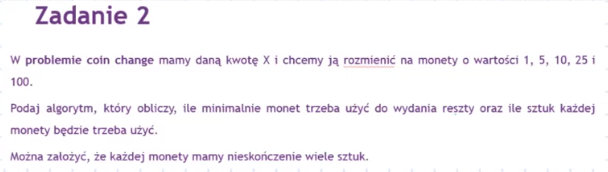

### Omówienie algorytmu

###### Kiedy algorytm zachłanny zadziała prawidłowo?
Aby algorytm zachłanny zadziałał prawidłowo, każdy następny nominał musi być <u><b>przynajmniej</b></u> $ 2 $-krotnie większy od poprzedniego. Wówczas nie zdarzy się taka sytuacja, że przez wzięcie najlepszego nominału, mniejszego niż pozostała do wydania kwota, będziemy musieli w następnych krokach brać takie nominały, które spowodują, że wydamy kwotę, używając większej liczby monet niż minimalna. Spójrzmy na poniższy przykład:
<br><br>
Załóżmy, że mamy do dyspozycji monety o nominałach: 1, 4 oraz 5 (czyli niespełniające założenia). W takiej sytuacji algorytm zachłanny, chcąc rozmienić kwotę np. 8, weźmie najpierw monetę o nominale 5, a w następnych krokach 3 monety o nominale 1. Nie jest to jednak najlepsze rozwiązanie, ponieważ optymalny wynik to wydanie 2 monet o nominale 4. Zatem nie możemy wziąć takiego zestawu monet.
<br><br>
Zauważmy, że mając monety o nominałach $ a_1 $, $ a_2 $, $ a_3 $, $ ... $, $ a_n $, dla których zachodzi zależność: $ a_1 \le 2 \cdot a_2 \le 4 \cdot a_3 \le ... \le 2n \cdot a_n $, zawsze mamy pewność, że algorytm zachłanny zadziała prawidłowo, bo gdybyśmy nie wzięli pewnej monety o nominale $ a_i $, która w danym momencie jest monetą o największym nominale, jaki jesteśmy w stanie wziąć, musielibyśmy wziąć przynajmniej 2 monety o mniejszym nominale (np. $ a_{i-1} $), aby wydać tę samą kwotę, jaką byśmy wydali, przy pomocy jednej monety o nominale $ a_i $.

###### Jaki jest ogólny warunek, aby otrzymać rozwiązanie?
Istnieje jeszcze warunek konieczny, jaki musi zajść, aby rozwiązanie dało się uzyskać dla dowolnej kwoty. W takim przypadku wśród naszych nominałów musi znaleźć się najmniejszy nominał, jaki obowiązuje w danym systemie monetarnym. Dzięki temu zawsze będziemy w stanie wydać każdą kwotę.

# Sposób I
### (Mniej inteligentny)

### Złożoność

###### Obliczeniowa
$ O(c \cdot log(c) + c + a) = O(c \cdot log(c) + a) $ <br>
Taka złożoność, ponieważ w najgorszym przypadku mamy monety o nominale $ 1 $, więc całą kwotę będziemy rozmieniać tyle razy, ile wynosi ta kwota, stąd $ O(a) $, gdzie $ a $ - rozmieniana kwota. Musimy również przesortować listę nominałów o liczbie nominałów równej $ c $.
###### Pamięciowa
$ O(c) $ - bo możemy wziąć maksymalnie $ c $ monet o różnych nominałach (tzn. każdy nominał po kilka razy, ale jest $ c $ nominałów)

### Implementacja

In [1]:
def exchange(amount, coins):
    # Assume we get unsorted array of coin denominations
    coins.sort(reverse=True)
    
    result = []
    total_count = 0
    
    for coin in coins:
        curr_count = 0
        while amount >= coin:
            amount -= coin
            curr_count += 1
        total_count += curr_count
        result.append((coin, curr_count))
        
    return total_count, result

###### Kilka testów

In [2]:
C = [1, 5, 10, 25, 100]
amount = 41

print(exchange(amount, C))

(4, [(100, 0), (25, 1), (10, 1), (5, 1), (1, 1)])


In [3]:
C = [1, 5, 10, 25, 100]
amount = 399

print(exchange(amount, C))

(12, [(100, 3), (25, 3), (10, 2), (5, 0), (1, 4)])


# Sposób II
### (Dużo lepszy)

### Dodatkowe omówienie

Możemy zauważyć, że odejmowanie kilka razy z rzędu tego samego nominału nie ma sensu, ponieważ zawsze odejmujemy go dopóki jest on nie większy niż pozostała do rozmienienia kwota. Możemy więc po prostu podzielić tę kwotę całkowitoliczbowo przez nominał (bierzemy podłogę z wyniku dzielenia) i to będzie liczba monet, jakie używamy, bez niepotrzebnego odejmowania w pętli. Ponieważ zwykle $ c \ll a $, gdzie $ a $ jest kwotą, jaką rozmieniamy, a $ c $ to liczba unikalnych monet, nie opłaca nam się sortować monet sortowaniem liniowym, ponieważ możemy mieć mało monet o dużych nominałach, więc sortowanie potrwa dłużej od zwykłego sortowania w czasie $ O(c \cdot log(c)) $. Jeszcze jedna uwaga, warto odfiltrować powtarzające się nominały, bo i tak mamy nieskończenie wiele monet o danym nominale.

### Złożoność

###### Obliczeniowa
$ O(c \cdot log(c)) $ - tak naprawdę dominuje czas sortowania, ponieważ to, ile monet używamy, obliczamy dla każdego nominału w czasie $ O(1) $ (proste dzielenie pozostałej kwoty przez nominał).
###### Pamięciowa
$ O(c) $ - jak w poprzedniej implementacji

### Implementacja

In [4]:
def move_repetitions(A):
    i = 1
    for j in range(1, len(A)):
        if A[j] != A[i - 1]:
            A[j], A[i] = A[i], A[j]
            i += 1
    return i - 1  # Return an index of the last non-repeated value


def exchange(amount, coins):
    # Assume we get unsorted array of coin denominations
    coins.sort(reverse=True)
    last_i = move_repetitions(coins)
    
    result = []
    total_count = 0
    
    for coin in coins:
        curr_count = amount // coin
        amount %= coin
        total_count += curr_count
        result.append((coin, curr_count))
        
    return total_count, result

###### Kilka testów

In [5]:
C = [1, 5, 10, 25, 100]
amount = 41

print(exchange(amount, C))

(4, [(100, 0), (25, 1), (10, 1), (5, 1), (1, 1)])


In [6]:
C = [1, 5, 10, 25, 100]
amount = 399

print(exchange(amount, C))

(12, [(100, 3), (25, 3), (10, 2), (5, 0), (1, 4)])
